# Feature Scaling


## Standardization & Normalization

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset("titanic")
df.head()

<IPython.core.display.Javascript object>

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df2 = df[['survived',"pclass",'age','parch']]

In [4]:
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [5]:
df3 = df2.fillna(df2.mean())

In [6]:
df3.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [7]:
X = df3.drop('survived',axis=1)
y = df3['survived']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (891, 3)
Shape of y =  (891,)


## train_test_split is used to split data into train and test data 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (712, 3)
Shape of y_train =  (712,)
Shape of X_test =  (179, 3)
Shape of y_test =  (179,)


In [9]:
sc = StandardScaler()
sc.fit(X_train)


StandardScaler()

In [10]:
sc.mean_


array([ 2.30617978, 29.55409121,  0.39185393])

In [11]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [12]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [13]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [14]:
X_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [15]:
X_train_sc =  pd.DataFrame(X_train_sc, columns = ["pclass",'age','parch'])
X_test_sc =  pd.DataFrame(X_test_sc, columns = ["pclass",'age','parch'])

In [16]:
X_train_sc.head()

,pclass,age,parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


In [17]:
X_train_sc.describe()

,pclass,age,parch
count,7.120000e+02,7.120000e+02,7.120000e+02
mean,1.160121e-16,1.521879e-16,6.237208e-17
std,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.547500e+00,-2.242528e+00,-4.919855e-01
25%,-6.589356e-01,-5.814583e-01,-4.919855e-01
50%,8.220055e-01,1.116307e-02,-4.919855e-01
75%,8.220055e-01,4.191860e-01,-4.919855e-01
max,8.220055e-01,3.190201e+00,5.785678e+00


In [18]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


In [19]:
mmc = MinMaxScaler()

In [20]:
mmc.fit(X_train)

MinMaxScaler()

In [21]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [22]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [23]:
X_train_mmc = pd.DataFrame(X_train_mmc,columns = ["pclass",'age','parch'])
X_test_mmc = pd.DataFrame(X_test_mmc,columns = ["pclass",'age','parch'])

In [24]:
X_train_mmc.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,0.653090,0.412781,0.078371
std,0.422326,0.184199,0.159407
min,0.000000,0.000000,0.000000
25%,0.375000,0.305752,0.000000
50%,1.000000,0.414836,0.000000
75%,1.000000,0.489940,0.000000
max,1.000000,1.000000,1.000000


In [25]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


<IPython.core.display.Javascript object>

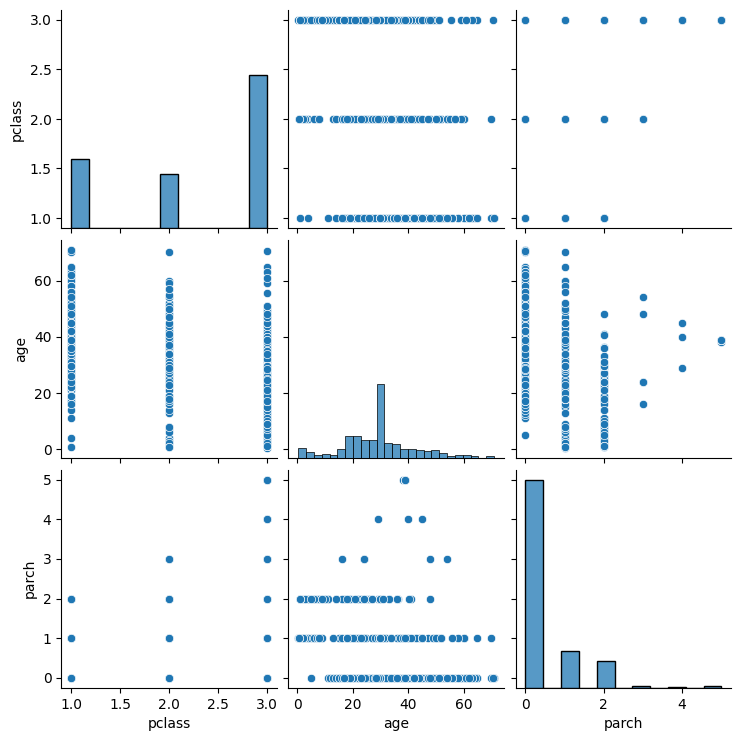

In [26]:
sns.pairplot(X_train)

<IPython.core.display.Javascript object>

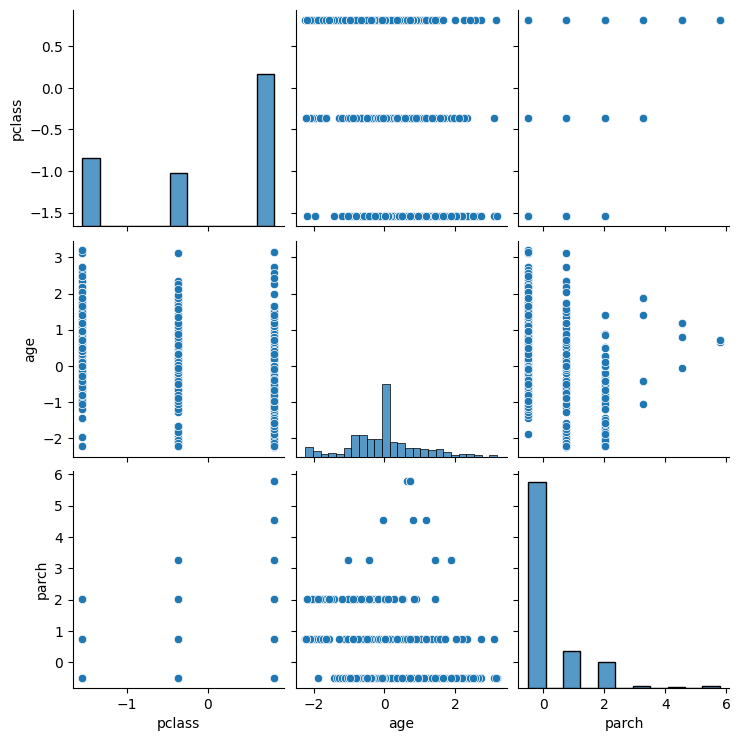

In [27]:
sns.pairplot(X_train_sc)

<IPython.core.display.Javascript object>

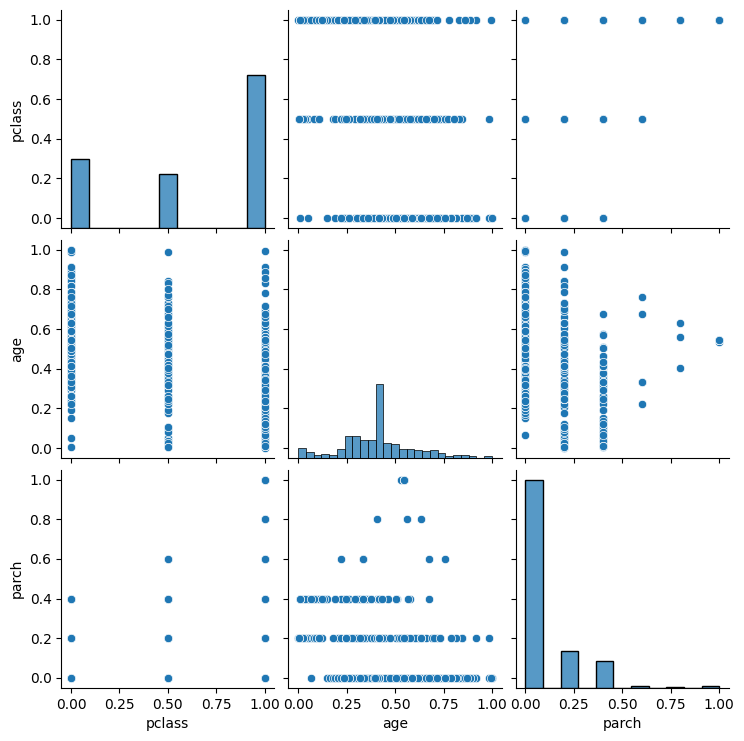

In [28]:
sns.pairplot(X_train_mmc)

## There is no change in data distribution after applying Standardization & Normalization.